# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import np_utils, plot_model
from matplotlib import pyplot as pl
from sklearn import metrics as me

from utils import plot_confusion_matrix

%matplotlib inline

2023-04-30 22:02:55.411276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 22:02:55.830426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [3]:
model = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dropout(0.4),
    Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


2023-04-30 22:02:56.728901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:02:56.737718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:02:56.737766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:02:56.739518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:02:56.739561: I tensorflow/compile

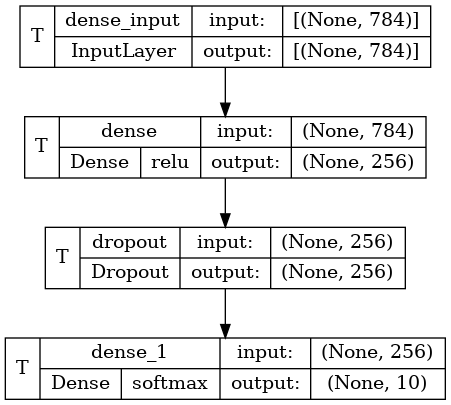

In [4]:
plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
    to_file='mlpr-model.png'
)

Define some constants and train the MLP

In [5]:
batch_size = 128
n_epoch = 15

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/15
 31/422 [=>............................] - ETA: 1s - loss: 1.0341 - accuracy: 0.7046

2023-04-30 22:02:58.732781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


422/422 [==============================] - 3s 6ms/step - loss: 0.3669 - accuracy: 0.8947 - val_loss: 0.1385 - val_accuracy: 0.9622
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1795 - accuracy: 0.9481 - val_loss: 0.1038 - val_accuracy: 0.9692
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1393 - accuracy: 0.9589 - val_loss: 0.0924 - val_accuracy: 0.9735
Epoch 4/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1140 - accuracy: 0.9658 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.0774 - val_accuracy: 0.9785
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0894 - accuracy: 0.9725 - val_loss: 0.0757 - val_accuracy: 0.9805
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0837 - accuracy: 0.9750 - val_loss: 0.0707 - val_accuracy: 0.9808
Epoch 8/15
422/42

Show the performance of the model

Test score: 0.06977342069149017
Test accuracy: 0.9821000099182129


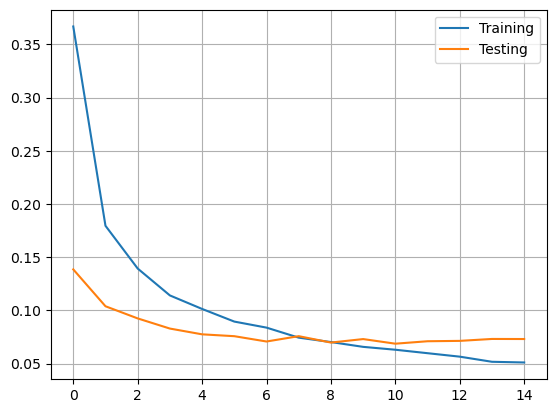

In [6]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

313/313 [==============================] - 0s 1ms/step


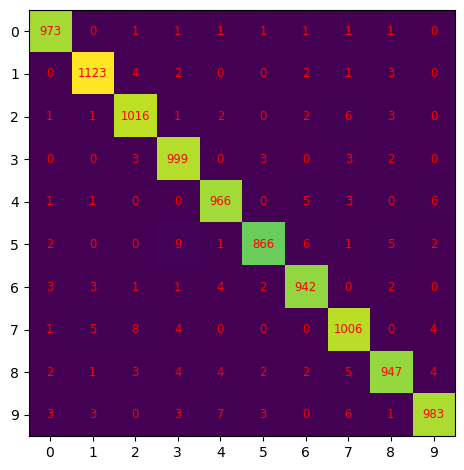

F-score 0: 0.9898270600203459
F-score 1: 0.988556338028169
F-score 2: 0.9825918762088974
F-score 3: 0.9823008849557522
F-score 4: 0.9822064056939501
F-score 5: 0.9790842283776144
F-score 6: 0.9822732012513035
F-score 7: 0.9766990291262135
F-score 8: 0.9772961816305469
F-score 9: 0.9790836653386454


In [7]:
pred = np.argmax(model.predict(X_test), axis=-1)
cm = me.confusion_matrix(y_test, pred)

plot_confusion_matrix(cm, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])